In [1]:
!pip install kaggle

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105796 sha256=b9023a66f99808fe47843b4122140062d517fdbdf3e528f9e512de864cf5db09
  Stored in directory: c:\users\vrt05\appdata\local\pip\cache\wheels\a5\6f\7b\837915771e94e181fa3052822926444e34f725ca38e70be77e
Successfully built kaggle


In [1]:
import kaggle

In [2]:
from kaggle.api.kaggle_api_extended import KaggleApi

In [3]:
api = KaggleApi()
api.authenticate()

In [4]:
api.dataset_download_file('dubradave/hospital-readmissions',
                          file_name = 'hospital_readmissions.csv',
                         path = r'C:\Users\vrt05\Downloads')

Dataset URL: https://www.kaggle.com/datasets/dubradave/hospital-readmissions


False

In [1]:
import pandas as pd
import numpy as np

In [2]:
import zipfile

In [3]:
with zipfile.ZipFile('hospital_readmissions.csv.zip', 'r') as zipref:
    zipref.extractall()

In [2]:
hospital_readmission = pd.read_csv('hospital_readmissions.csv')

In [3]:
hospital_readmission

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,[80-90),14,77,1,30,0,0,0,Missing,Circulatory,Other,Circulatory,no,normal,no,no,yes
24996,[80-90),2,66,0,24,0,0,0,Missing,Digestive,Injury,Other,no,high,yes,yes,yes
24997,[70-80),5,12,0,6,0,1,0,Missing,Other,Other,Other,normal,no,no,no,yes
24998,[70-80),2,61,3,15,0,0,0,Family/GeneralPractice,Respiratory,Diabetes,Other,no,no,yes,yes,no


In [4]:
hospital_readmission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

In [5]:
hospital_readmission['age']= hospital_readmission['age'].str.replace('[','(',regex=False)

In [6]:
hospital_readmission.isnull().sum()

age                  0
time_in_hospital     0
n_lab_procedures     0
n_procedures         0
n_medications        0
n_outpatient         0
n_inpatient          0
n_emergency          0
medical_specialty    0
diag_1               0
diag_2               0
diag_3               0
glucose_test         0
A1Ctest              0
change               0
diabetes_med         0
readmitted           0
dtype: int64

In [7]:
hospital_readmission.describe()

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency
count,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.45332,43.24076,1.352360,16.252400,0.366400,0.615960,0.186600
std,3.00147,19.81862,1.715179,8.060532,1.195478,1.177951,0.885873
min,1.00000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.00000,31.00000,0.000000,11.000000,0.000000,0.000000,0.000000
50%,4.00000,44.00000,1.000000,15.000000,0.000000,0.000000,0.000000
75%,6.00000,57.00000,2.000000,20.000000,0.000000,1.000000,0.000000
max,14.00000,113.00000,6.000000,79.000000,33.000000,15.000000,64.000000


In [8]:
hospital_readmission['diag_1'] = np.where(hospital_readmission['diag_1'] == 'Other', 
                            np.where(hospital_readmission['diag_2'] == 'Other',
                                     hospital_readmission['diag_3'],
                                     hospital_readmission['diag_2']
                                    ), 
                            hospital_readmission['diag_1'])

hospital_readmission['diag_1'].value_counts(normalize=True)

Circulatory        0.39128
Respiratory        0.17760
Diabetes           0.12628
Digestive          0.10988
Injury             0.07576
Other              0.06272
Musculoskeletal    0.05600
Missing            0.00048
Name: diag_1, dtype: float64

In [9]:
hospital_readmission['age'].value_counts()

(70-80)     6837
(60-70)     5913
(80-90)     4516
(50-60)     4452
(40-50)     2532
(90-100)     750
Name: age, dtype: int64

In [10]:
hospital_readmission['glucose_test'].unique()

array(['no', 'normal', 'high'], dtype=object)

In [11]:
corr_matrix = hospital_readmission.corr()

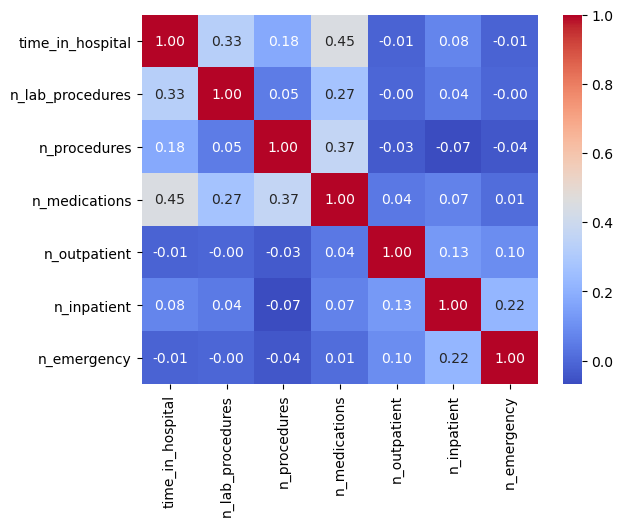

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr_matrix, annot =True, cmap = 'coolwarm', fmt = '.2f');

High correlation b/w time_in_hospital and n_medications, n_lab_procedures
n_procedures has high dependency with n_medications.

**So, in general the n_medications has a high positive correlation with time in hospital, n_procedures, n_lab_procedures.
n_inpatient is also dependant on n_emergency.**

C:\Users\vrt05\envs\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='readmitted', ylabel='count'>

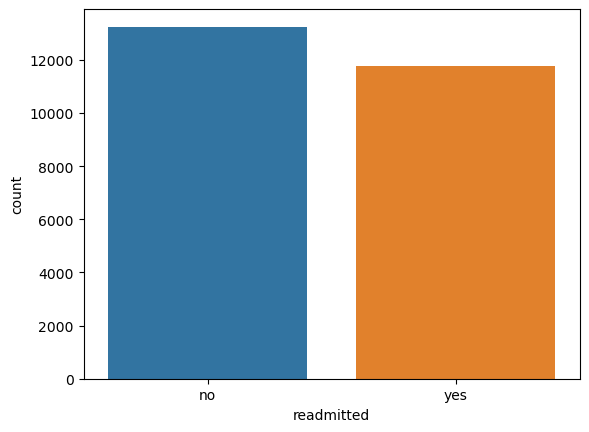

In [13]:
sns.countplot('readmitted', data=hospital_readmission)

It is a balanced dataset with almost equal counts of the target labels.

### Let's compare the time in hospital by the glucose levels

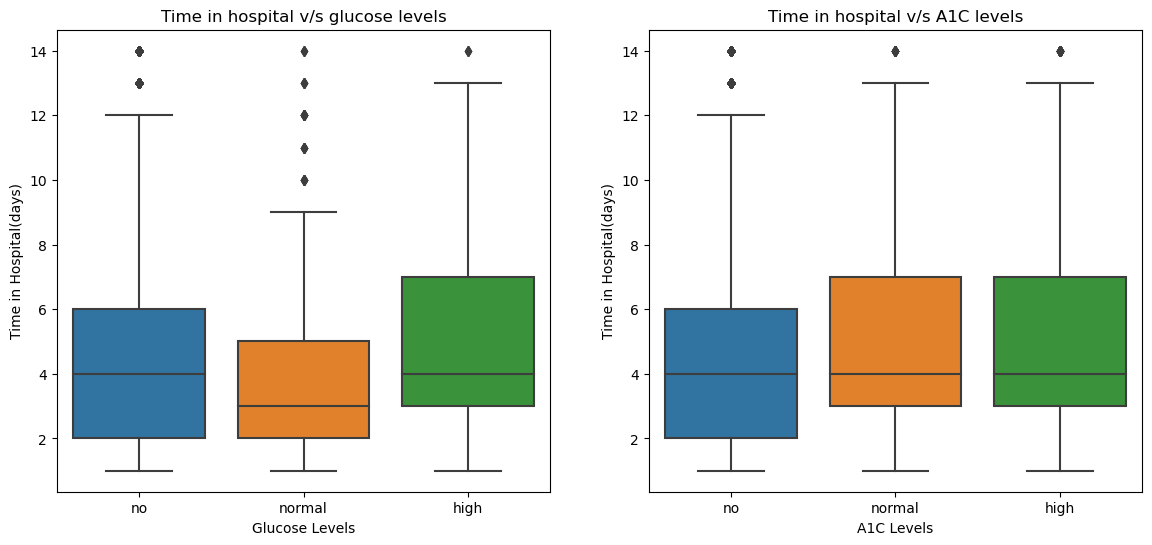

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(x='glucose_test', y='time_in_hospital', data=hospital_readmission, ax=axes[0])
axes[0].set_title('Time in hospital v/s glucose levels')
axes[0].set_ylabel('Time in Hospital(days)')
axes[0].set_xlabel('Glucose Levels')

sns.boxplot(x='A1Ctest', y='time_in_hospital', data=hospital_readmission, ax=axes[1])
axes[1].set_title('Time in hospital v/s A1C levels')
axes[1].set_ylabel('Time in Hospital(days)')
axes[1].set_xlabel('A1C Levels')

plt.show()

There is an indication that high Glucose levels patients tend to spend more time at a hospital than those with normal levels.

Presence of outliers for people with normal glucose levels indicate that these patients might have additional health issues.

A1C however, does not have any difference between groups of patients with normal or high levels.

<AxesSubplot:xlabel='age', ylabel='count'>

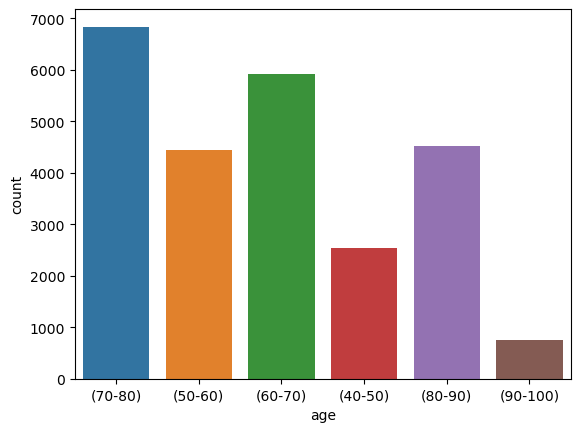

In [15]:
sns.countplot(x='age', data=hospital_readmission)

<AxesSubplot:xlabel='age', ylabel='count'>

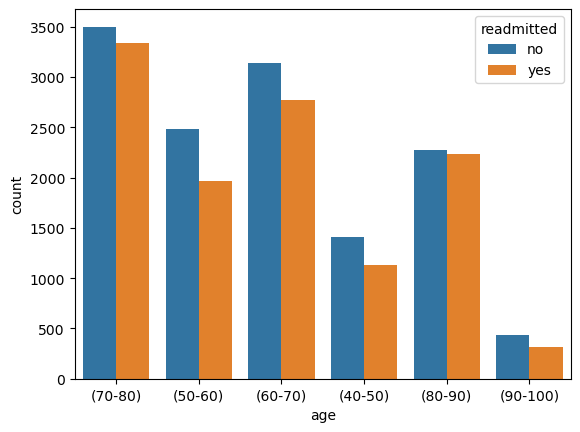

In [16]:
sns.countplot(x='age',hue='readmitted', data=hospital_readmission)

The Age Brackets indicate the primary group is between 70-80.

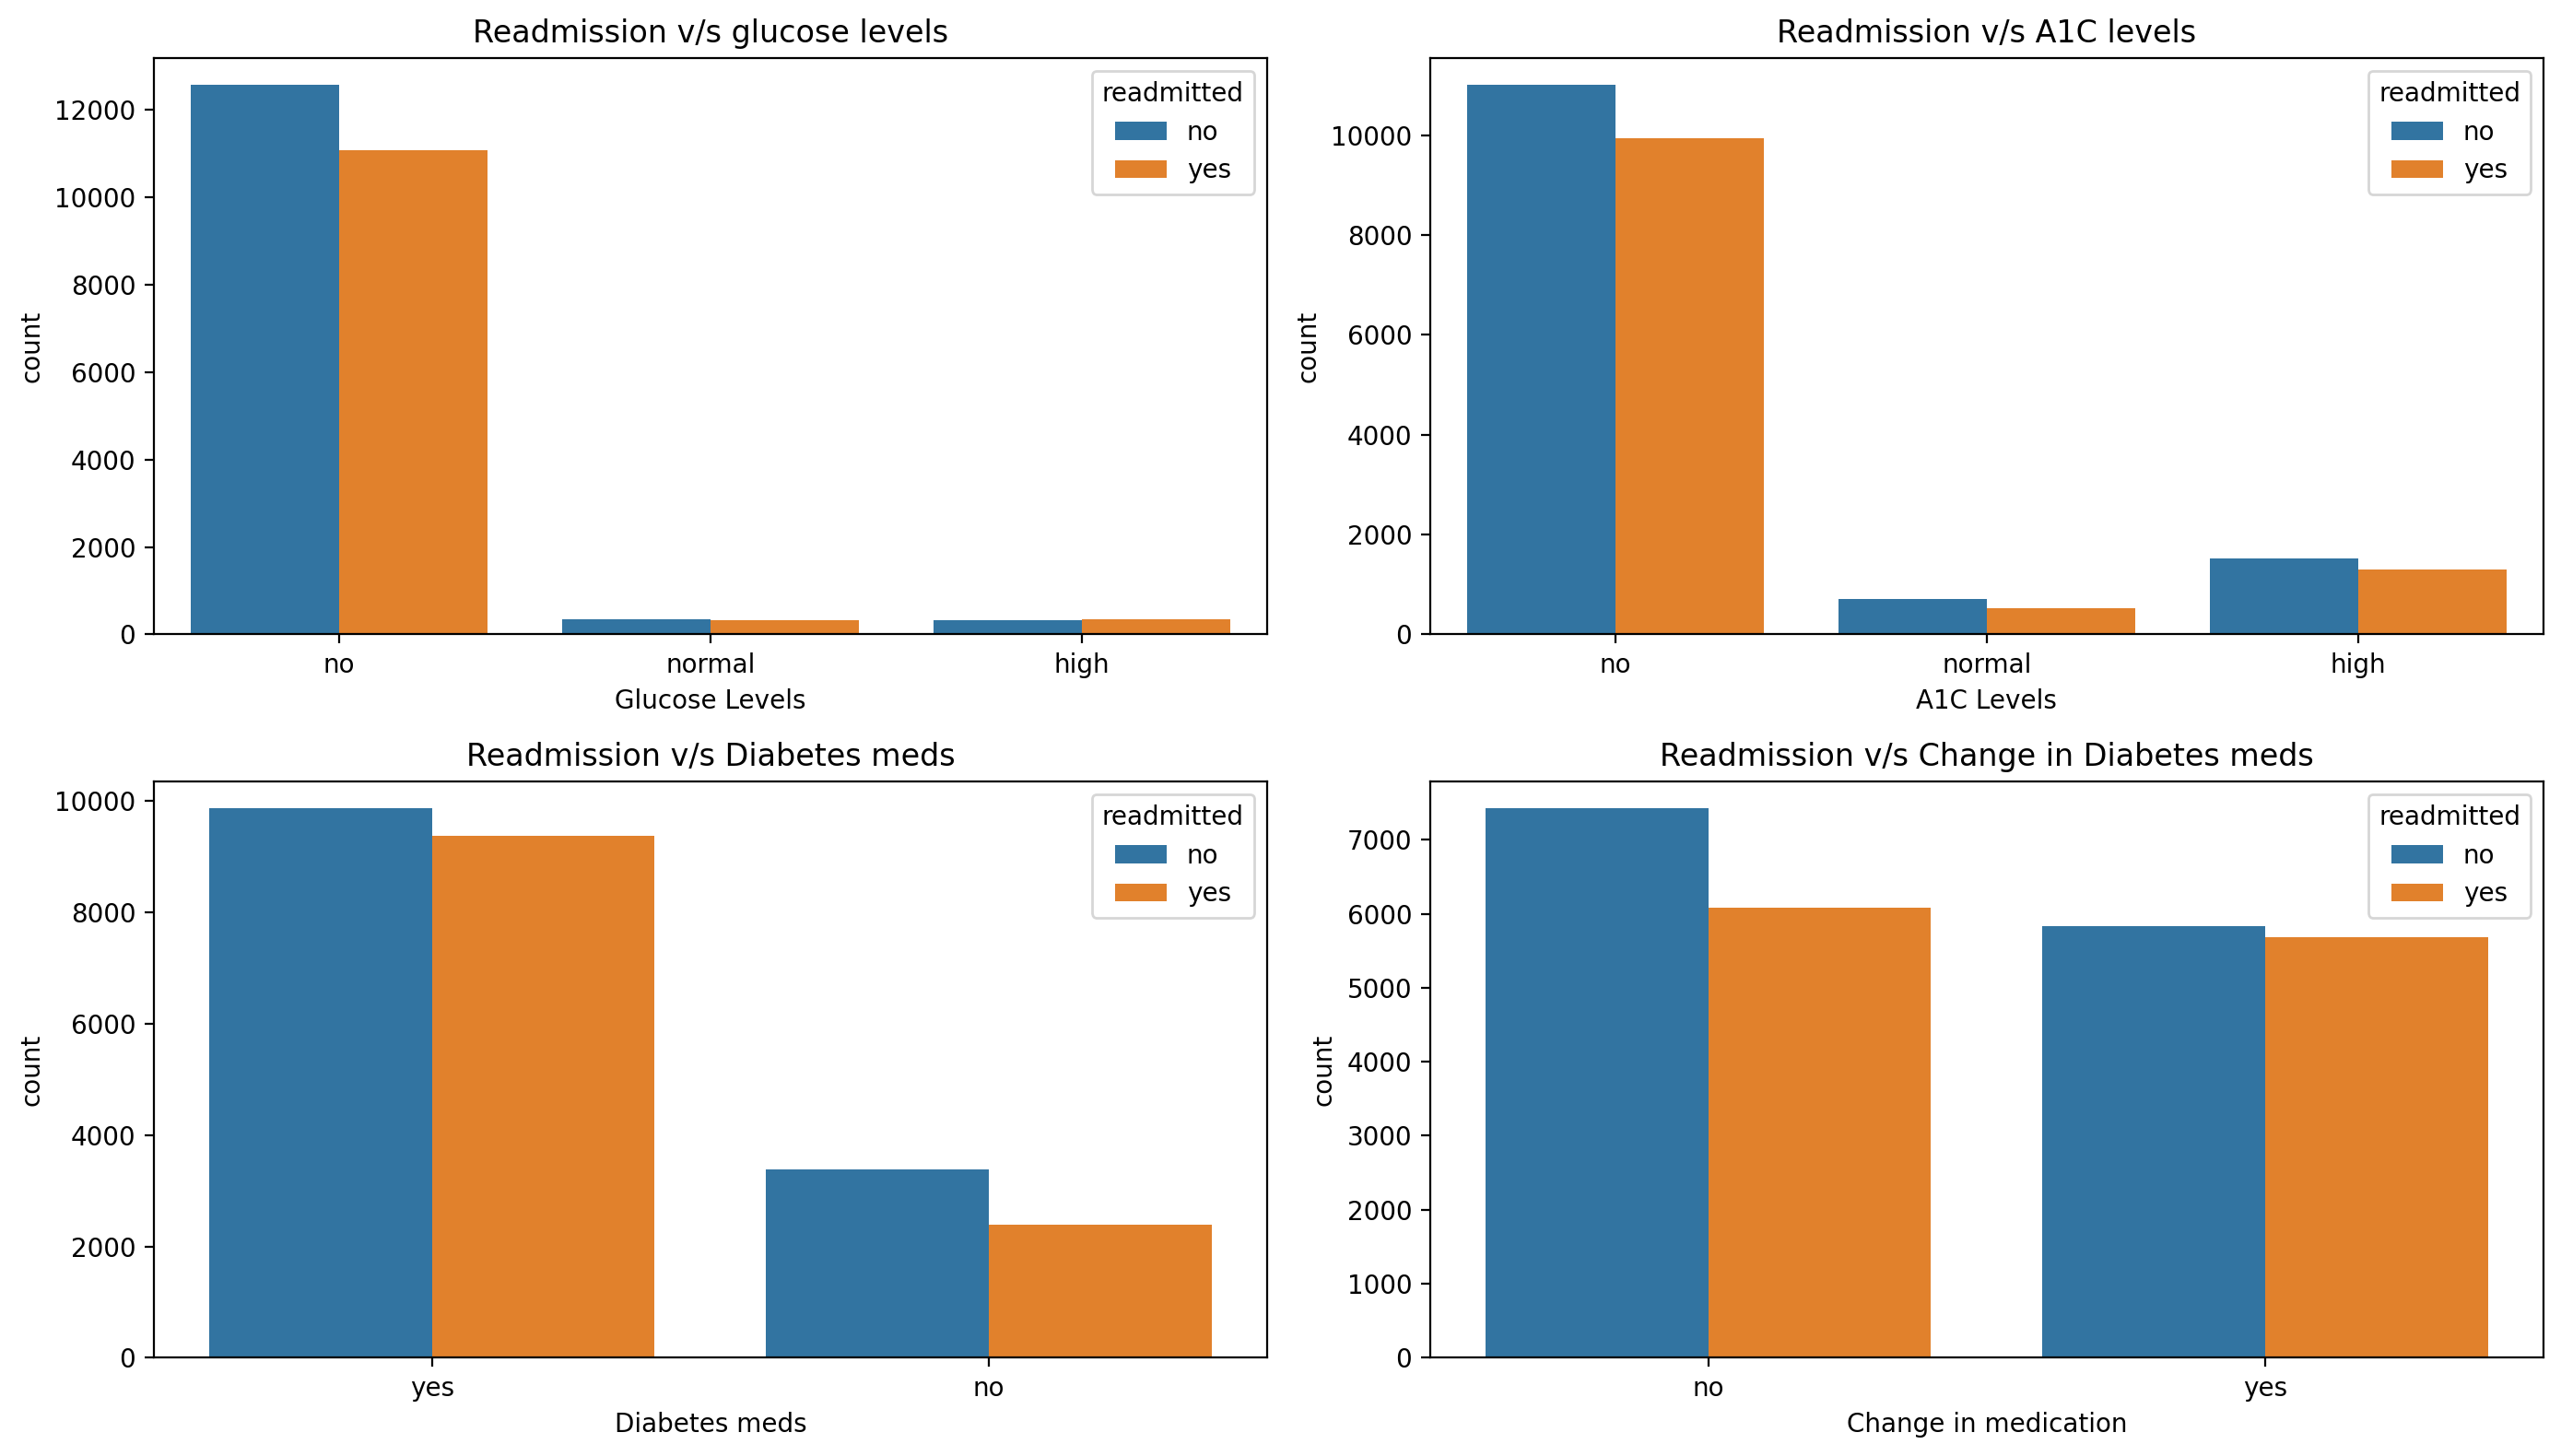

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8), dpi=200)

sns.countplot(x='glucose_test',hue='readmitted', data=hospital_readmission, ax=axes[0,0])
axes[0,0].set_title('Readmission v/s glucose levels')
axes[0,0].set_xlabel('Glucose Levels')

sns.countplot(x='A1Ctest',hue='readmitted', data=hospital_readmission, ax=axes[0,1])
axes[0,1].set_title('Readmission v/s A1C levels')
axes[0,1].set_xlabel('A1C Levels')

sns.countplot(x='diabetes_med',hue='readmitted', data=hospital_readmission, ax=axes[1,0])
axes[1,0].set_title('Readmission v/s Diabetes meds')
axes[1,0].set_xlabel('Diabetes meds')

sns.countplot(x='change',hue='readmitted', data=hospital_readmission, ax=axes[1,1])
axes[1,1].set_title('Readmission v/s Change in Diabetes meds')
axes[1,1].set_xlabel('Change in medication')

plt.tight_layout()

As per the above observations, Diabetes medications seem to have readmission chances higher. 

Also, the people that did not have their glucose levels or A1C tests performed have higher readmission percentage indicating that the initial and secondary diagnosis are much more accountable for the readmissions.

In [18]:
hospital_readmission

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,(70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,(70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,(50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,(70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,(60-70),1,42,0,7,0,0,0,InternalMedicine,Circulatory,Circulatory,Respiratory,no,no,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,(80-90),14,77,1,30,0,0,0,Missing,Circulatory,Other,Circulatory,no,normal,no,no,yes
24996,(80-90),2,66,0,24,0,0,0,Missing,Digestive,Injury,Other,no,high,yes,yes,yes
24997,(70-80),5,12,0,6,0,1,0,Missing,Other,Other,Other,normal,no,no,no,yes
24998,(70-80),2,61,3,15,0,0,0,Family/GeneralPractice,Respiratory,Diabetes,Other,no,no,yes,yes,no


In [19]:
hospital_readmission['diag_1'].value_counts()

Circulatory        9782
Respiratory        4440
Diabetes           3157
Digestive          2747
Injury             1894
Other              1568
Musculoskeletal    1400
Missing              12
Name: diag_1, dtype: int64

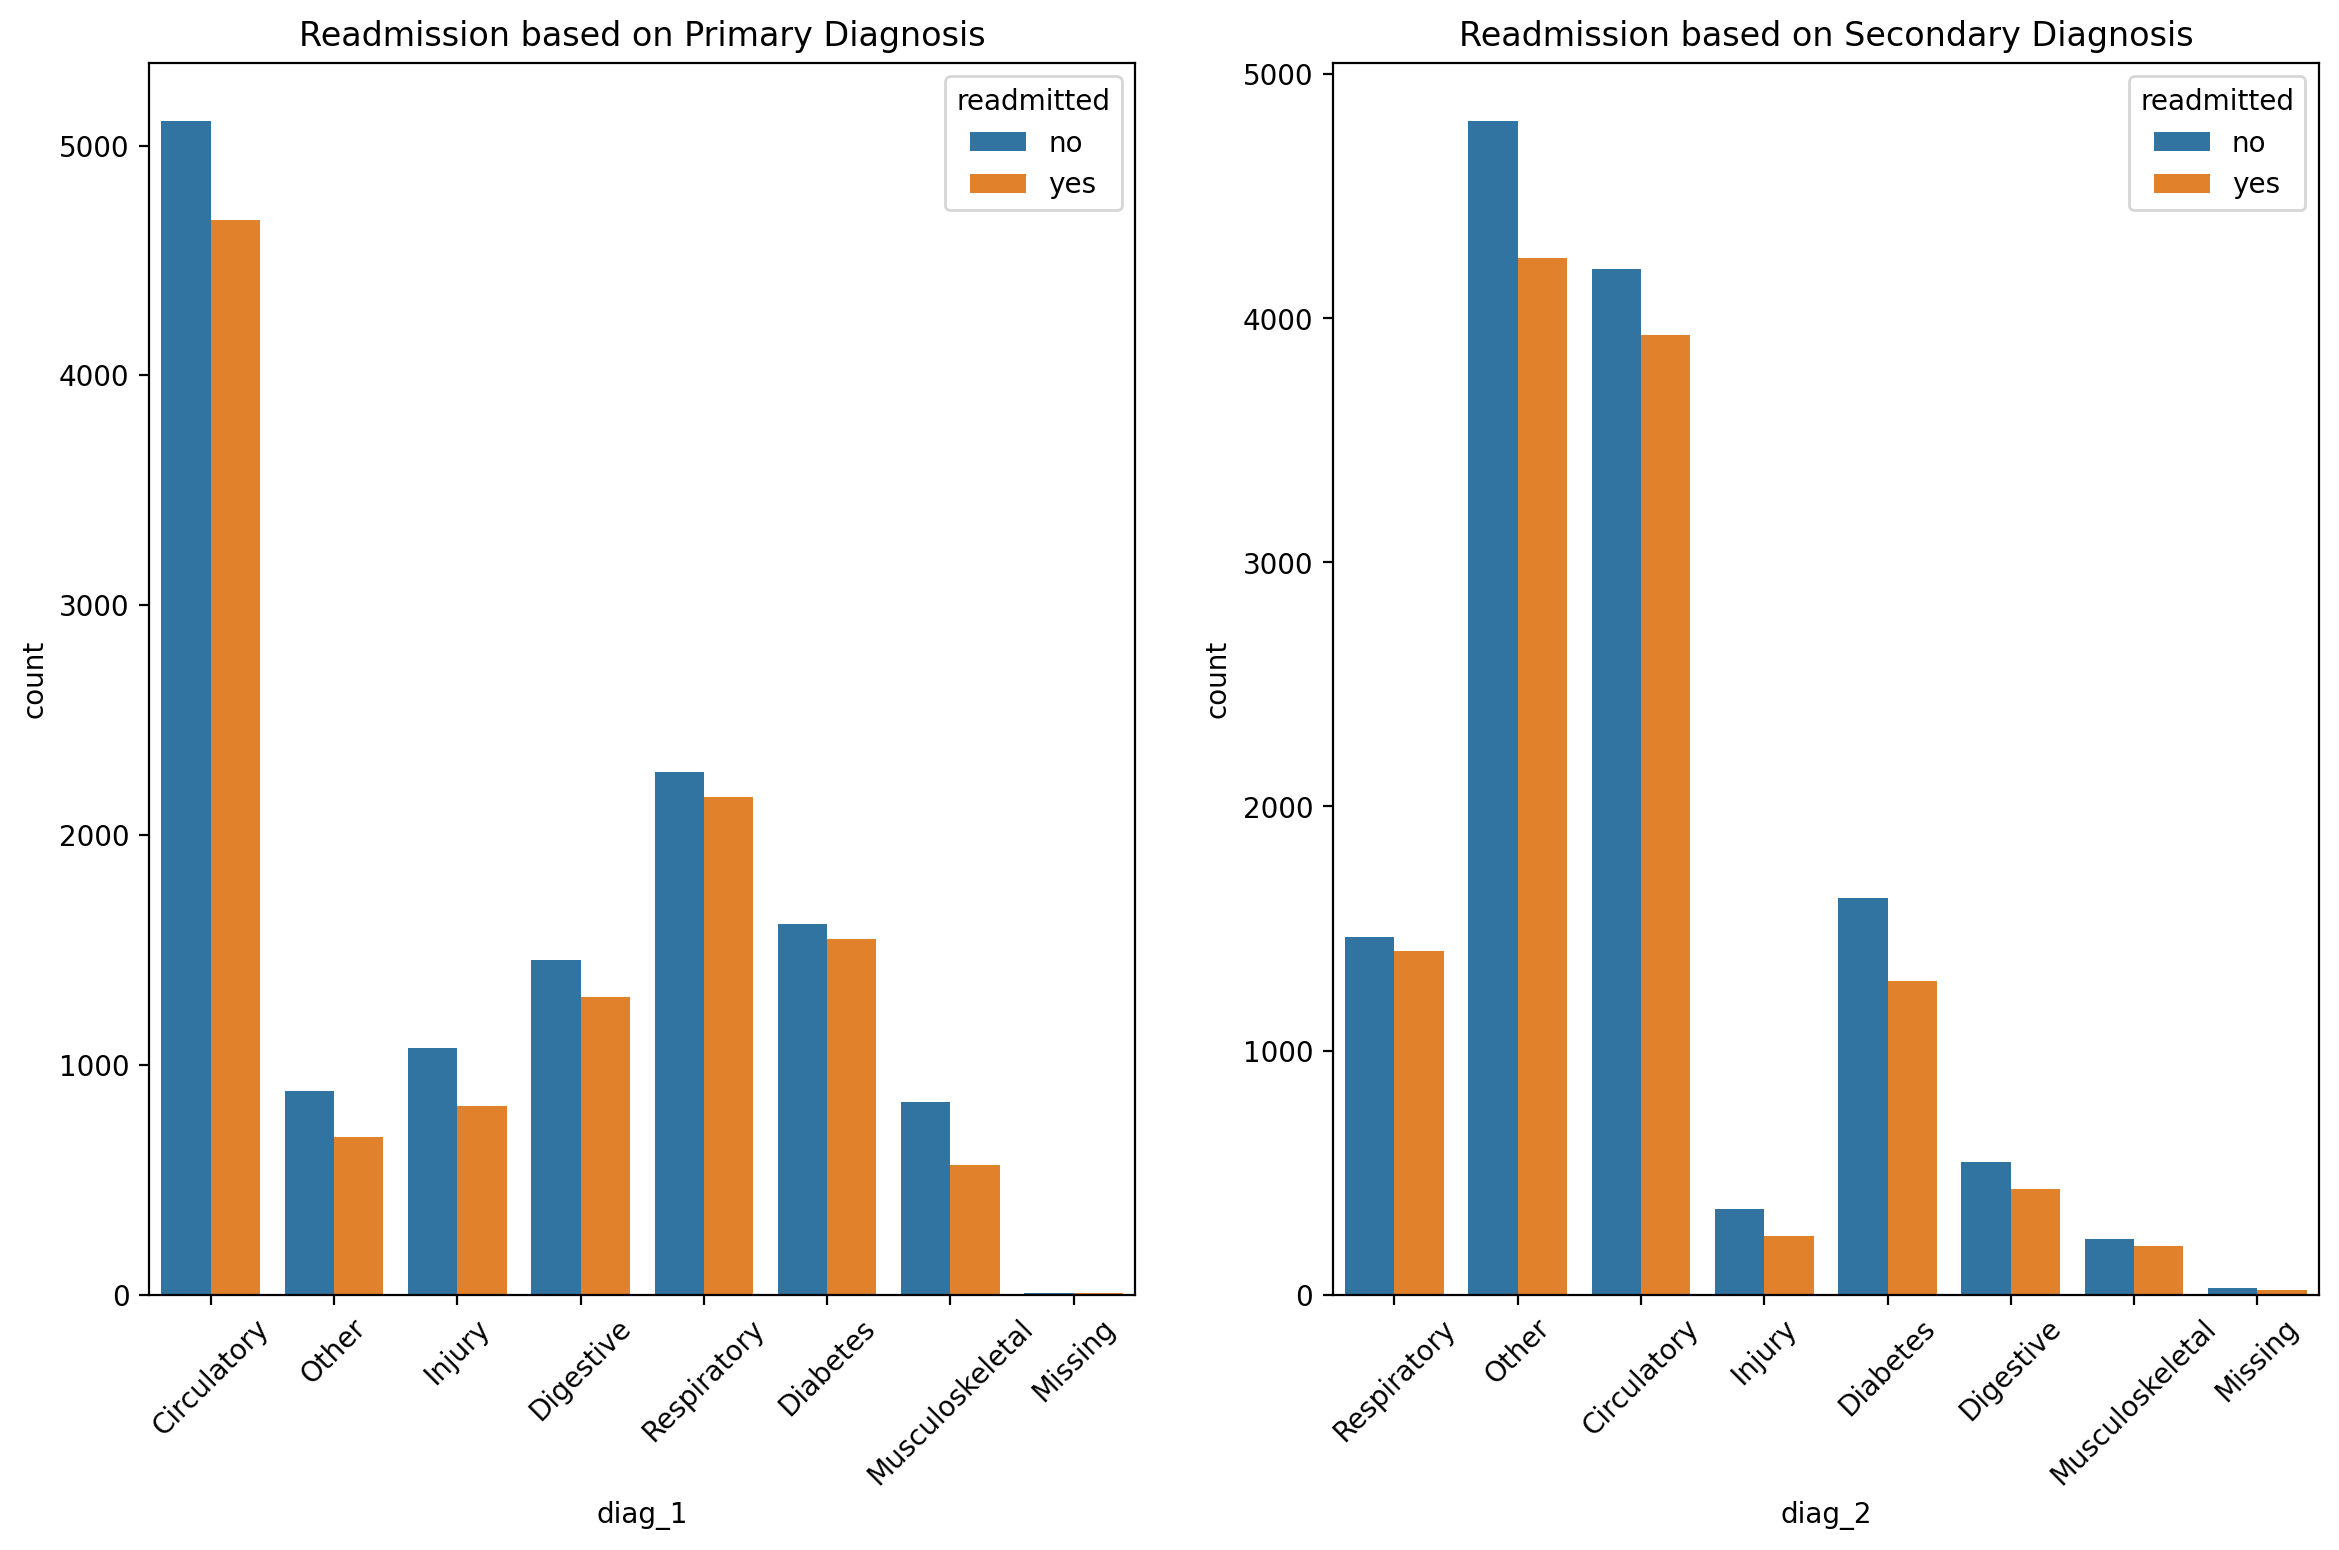

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(14, 8), dpi=200)

sns.countplot(x='diag_1',hue='readmitted', data=hospital_readmission, ax =axes[0])
axes[0].set_title('Readmission based on Primary Diagnosis')

sns.countplot(x='diag_2',hue='readmitted', data=hospital_readmission, ax = axes[1])
axes[1].set_title('Readmission based on Secondary Diagnosis')

for ax in axes:
    ax.tick_params(axis='x',labelrotation=45);

In [21]:
# sns.countplot(x='diag_2',hue='readmitted', data=hospital_readmission)

# plt.xticks(rotation = 45);

In [22]:
hospital_readmission['Diabetes_readmit'] = (hospital_readmission['diag_1'].str.contains('Diabetes') | hospital_readmission['diag_2'].str.contains('Diabetes')
                                             |hospital_readmission['diag_3'].str.contains('Diabetes')) *1

In [23]:
binarycolumns = ['glucose_test', 'A1Ctest']

for i in binarycolumns:
    hospital_readmission[i+'_le'] = hospital_readmission[i].apply(lambda x:0 if x =='no' else 1 if x =='normal' else 2)

In [24]:
cat_columns = ['change', 'diabetes_med', 'readmitted']
for i in cat_columns:
    hospital_readmission[i] = hospital_readmission[i].apply(lambda x:0 if x == 'no' else 1)

In [25]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
le = LabelEncoder()

In [26]:
# hospital_readmission[hospital_readmission['diag_1'] == 'Diabetes']
# diabetes_readmit['change'].value_counts()
# plt.figure(figsize=(14,8))
# diabetes_readmit.plot(kind='area');

hospital_readmission['age_le'] = le.fit_transform(hospital_readmission['age'])




In [94]:
df = hospital_readmission.copy()

In [28]:
# sns.scatterplot(x =diabetes_readmit['diabetes_med'].value_counts(),y=diabetes_readmit['change'].value_counts(), data = diabetes_readmit, hue='diag_2')
# plt.pie(x='readmitted', data=hospital_readmission[hospital_readmission['diag_1'] == 'Diabetes'])
# df['age_le'] = le.fit_transform(df['age'])

In [29]:
hospital_readmission

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,...,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted,Diabetes_readmit,glucose_test_le,A1Ctest_le,age_le
0,(70-80),8,72,1,18,2,0,0,Missing,Circulatory,...,Other,no,no,0,1,0,0,0,0,3
1,(70-80),3,34,2,13,0,0,0,Other,Other,...,Other,no,no,0,1,0,0,0,0,3
2,(50-60),5,45,0,18,0,0,0,Missing,Circulatory,...,Circulatory,no,no,1,1,1,0,0,0,1
3,(70-80),2,36,0,12,1,0,0,Missing,Circulatory,...,Diabetes,no,no,1,1,1,1,0,0,3
4,(60-70),1,42,0,7,0,0,0,InternalMedicine,Circulatory,...,Respiratory,no,no,0,1,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,(80-90),14,77,1,30,0,0,0,Missing,Circulatory,...,Circulatory,no,normal,0,0,1,0,0,1,4
24996,(80-90),2,66,0,24,0,0,0,Missing,Digestive,...,Other,no,high,1,1,1,0,0,2,4
24997,(70-80),5,12,0,6,0,1,0,Missing,Other,...,Other,normal,no,0,0,1,0,1,0,3
24998,(70-80),2,61,3,15,0,0,0,Family/GeneralPractice,Respiratory,...,Other,no,no,1,1,0,1,0,0,3


In [30]:
# diabetics_df.dtypes

In [31]:
X = df.drop(['readmitted', 'glucose_test', 'A1Ctest','age','medical_specialty', 'diag_1', 'diag_2', 'diag_3'], axis=1)
y = df['readmitted']

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [34]:
scaler = StandardScaler()

In [35]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier

In [36]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [37]:
ada_c = AdaBoostClassifier()
rf_c = RandomForestClassifier()
grad_c = GradientBoostingClassifier()

In [38]:
# models = [ada_c, rf_c, grad_c]

# for model in models:
#     model.fit(scaled_X_train, y_train)
    
#     final_predictions_ = model.predict(scaled_X_test)

In [39]:
ada_c.fit(scaled_X_train, y_train)

AdaBoostClassifier()

In [40]:
prediction_1 = ada_c.predict(scaled_X_test)

In [41]:
rf_c.fit(scaled_X_train, y_train)
prediction_2 = rf_c.predict(scaled_X_test)

In [42]:
grad_c.fit(scaled_X_train, y_train)
prediction_3 = grad_c.predict(scaled_X_test)

In [43]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score, f1_score, classification_report, plot_roc_curve

In [44]:
predicts = [prediction_1, prediction_2, prediction_3]

In [45]:
predicts = [prediction_1, prediction_2, prediction_3]

for i, predict in enumerate(predicts, start=1):
    print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.61      0.77      0.68      2615
           1       0.64      0.45      0.53      2385

    accuracy                           0.62      5000
   macro avg       0.62      0.61      0.60      5000
weighted avg       0.62      0.62      0.61      5000

              precision    recall  f1-score   support

           0       0.59      0.66      0.63      2615
           1       0.57      0.50      0.53      2385

    accuracy                           0.58      5000
   macro avg       0.58      0.58      0.58      5000
weighted avg       0.58      0.58      0.58      5000

              precision    recall  f1-score   support

           0       0.61      0.76      0.68      2615
           1       0.64      0.47      0.54      2385

    accuracy                           0.62      5000
   macro avg       0.62      0.61      0.61      5000
weighted avg       0.62      0.62      0.61      5000



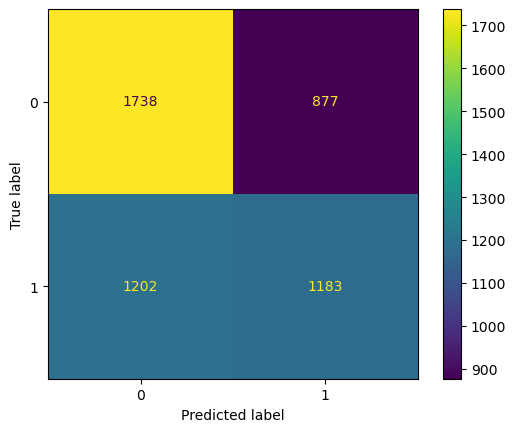

In [46]:
plot_confusion_matrix(rf_c, scaled_X_test, y_test)

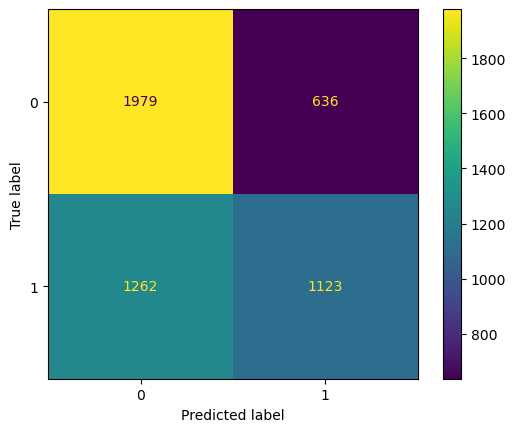

In [47]:
plot_confusion_matrix(grad_c, scaled_X_test, y_test)

In [48]:
# X.columns

In [49]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [50]:
log_model = LogisticRegression()
log_model_cv = LogisticRegressionCV(Cs=[1, 10, 50, 100], max_iter=10000)

In [51]:
log_model.fit(scaled_X_train, y_train)
prediction_4 = log_model.predict(scaled_X_test)

In [52]:
log_model_cv.fit(scaled_X_train, y_train)
prediction_5 = log_model_cv.predict(scaled_X_test)

In [53]:
# print(classification_report(y_test, prediction_4))

In [54]:
# plot_confusion_matrix(log_model, X_test, y_test)

In [55]:
print(classification_report(y_test, prediction_5))

              precision    recall  f1-score   support

           0       0.59      0.80      0.68      2615
           1       0.64      0.38      0.48      2385

    accuracy                           0.60      5000
   macro avg       0.61      0.59      0.58      5000
weighted avg       0.61      0.60      0.58      5000



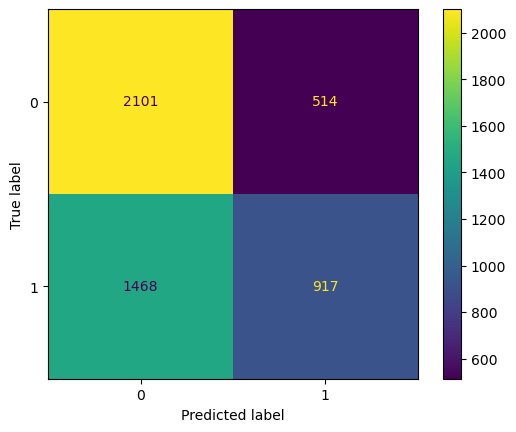

In [56]:
plot_confusion_matrix(log_model_cv, scaled_X_test, y_test)

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
decision = DecisionTreeClassifier()

In [59]:
decision.fit(scaled_X_train, y_train)
prediction_6 = decision.predict(scaled_X_test)

In [60]:
print(classification_report(y_test, prediction_6))

              precision    recall  f1-score   support

           0       0.55      0.58      0.56      2615
           1       0.51      0.49      0.50      2385

    accuracy                           0.54      5000
   macro avg       0.53      0.53      0.53      5000
weighted avg       0.54      0.54      0.54      5000



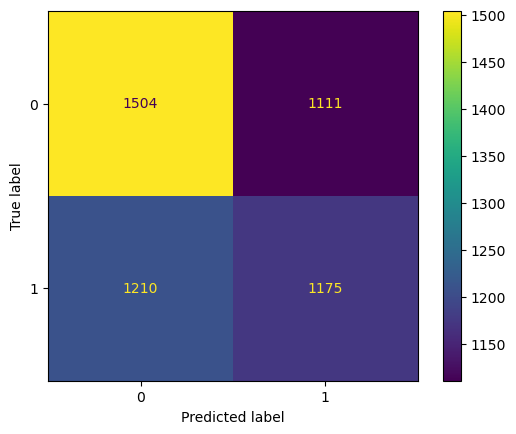

In [61]:
plot_confusion_matrix(decision, scaled_X_test, y_test)

In [62]:
accuracy_score(y_test, prediction_1)

0.6176

In [63]:
predictions = [prediction_1, prediction_2, prediction_3, prediction_5, prediction_6]

for i, predict in enumerate(predictions, start=1):
    print(f'Accuracy score : {accuracy_score(y_test, predict)}')
    print(f'F1 score : {f1_score(y_test, predict)}')

Accuracy score : 0.6176
F1 score : 0.5288319369147363
Accuracy score : 0.5842
F1 score : 0.5322834645669292
Accuracy score : 0.6204
F1 score : 0.541988416988417
Accuracy score : 0.6036
F1 score : 0.4806079664570231
Accuracy score : 0.5358
F1 score : 0.5031042603296939


In [64]:
# Based on the correlation metrics, will reduce columns time_in_hospital and n_medications
# As per the EDA, we found that glucose levels and A1C levels do not have a significant influence on the readmission change
X1 = df.drop(['n_outpatient',
       'n_emergency','time_in_hospital', 'n_medications', 'readmitted', 'glucose_test', 'A1Ctest','age','medical_specialty', 'diag_1', 'diag_2', 'diag_3','glucose_test_le', 'A1Ctest_le', 'Diabetes_readmit'], axis=1)
y1 = df['readmitted']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.30, random_state=101)

In [66]:
X_test.values.reshape(1, -1)

array([[67,  0,  0, ...,  0,  0,  4]], dtype=int64)

In [67]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [68]:
logistic = LogisticRegression()

In [69]:
logistic = logistic.fit(scaled_X_train, y_train)
preds = logistic.predict(scaled_X_test)

In [70]:
preds

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [71]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.59      0.80      0.68      3965
           1       0.62      0.37      0.47      3535

    accuracy                           0.60      7500
   macro avg       0.60      0.59      0.57      7500
weighted avg       0.60      0.60      0.58      7500



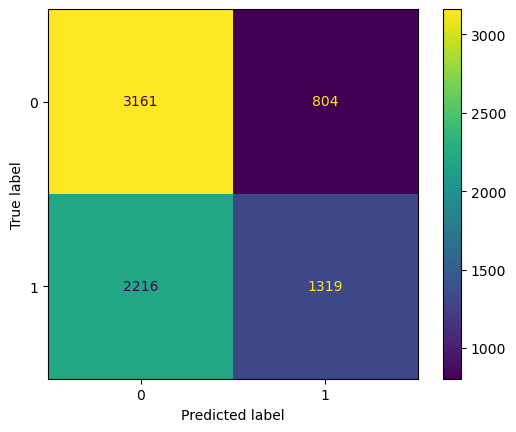

In [72]:
plot_confusion_matrix(logistic, scaled_X_test, y_test)

In [73]:
accuracy_score(y_test, preds)

0.5973333333333334

In [74]:
f1_score(y_test, preds)
# rf_model = RandomForestClassifier()
# rf_model.fit(scaled_X_train, y_train)
# rf_pred = rf_model.predict(X_test)
# # rf_pred

0.46624248851184164

In [75]:
# print(classification_report(y_test, rf_pred))

In [76]:
# plot_confusion_matrix(rf_model, X_test, y_test)

In [77]:
# rf_model

In [78]:
logistic.coef_

array([[ 0.04622803, -0.05485178,  0.51787128,  0.03057203,  0.1157278 ,
         0.07064835]])

In [79]:
X1.columns

Index(['n_lab_procedures', 'n_procedures', 'n_inpatient', 'change',
       'diabetes_med', 'age_le'],
      dtype='object')

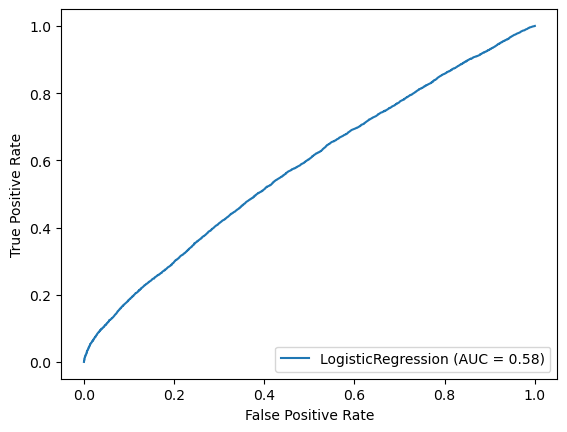

In [80]:
plot_roc_curve(logistic, X1, y1);

In [81]:
gradient = GradientBoostingClassifier()
gradient = gradient.fit(scaled_X_train, y_train)
gradient_pred = gradient.predict(scaled_X_test)

In [86]:
gradient.feature_importances_

array([0.11942106, 0.03575242, 0.68335389, 0.01302459, 0.05028218,
       0.09816586])

In [87]:
X1.columns

Index(['n_lab_procedures', 'n_procedures', 'n_inpatient', 'change',
       'diabetes_med', 'age_le'],
      dtype='object')

In [105]:
# df_final = df.drop(['n_procedures','change','n_outpatient','n_emergency','time_in_hospital', 'n_medications', 'readmitted', 'glucose_test', 'A1Ctest','age','medical_specialty', 'diag_1', 'diag_2', 'diag_3','glucose_test_le', 'A1Ctest_le', 'Diabetes_readmit'], axis=1)

In [106]:
# X2 = df_final
# y2 = df['readmitted']

In [107]:
# X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X2, y2, test_size=0.20, random_state=101)
# scale_X_train = scaler.fit_transform(X_train_1)
# scale_X_test = scaler.transform(X_test_1)

In [108]:
# gradient_1 = GradientBoostingClassifier()
# gradient_1 = gradient_1.fit(scale_X_train, y_train_1)
# gradient_pred_1 = gradient_1.predict(scale_X_test)

In [109]:
# print(classification_report(y_test_1, gradient_pred_1))

In [82]:
print(classification_report(y_test, gradient_pred))

              precision    recall  f1-score   support

           0       0.60      0.75      0.67      3965
           1       0.61      0.44      0.51      3535

    accuracy                           0.60      7500
   macro avg       0.61      0.60      0.59      7500
weighted avg       0.61      0.60      0.59      7500



In [110]:
# plot_confusion_matrix(gradient_1, scale_X_test, y_test_1)

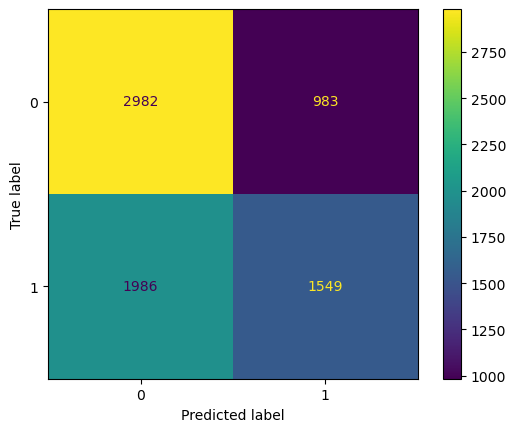

In [83]:
plot_confusion_matrix(gradient, scaled_X_test, y_test)

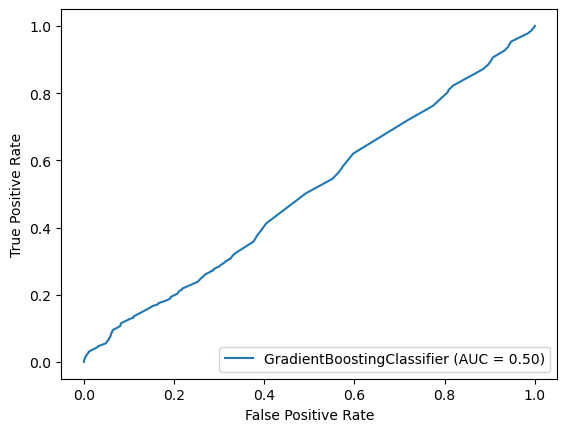

In [84]:
plot_roc_curve(gradient, X1, y1);

C:\Users\vrt05\envs\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


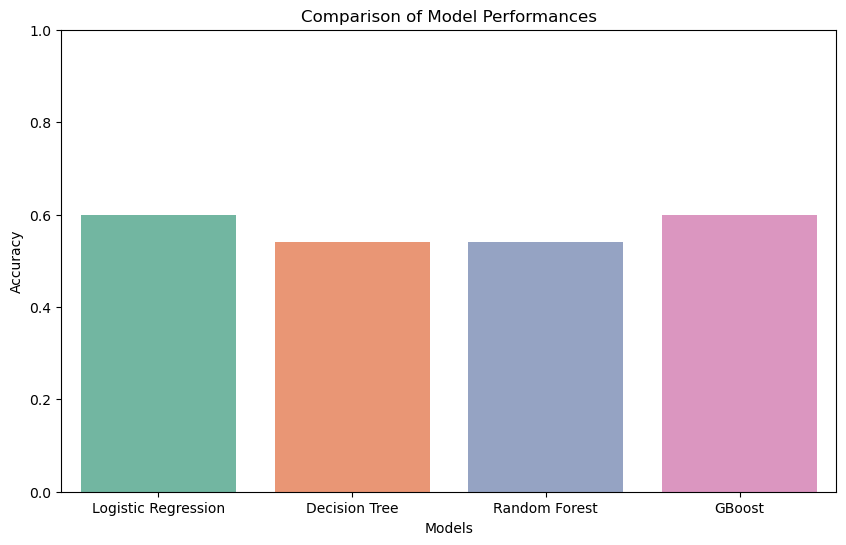

In [85]:
# Model names 
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'GBoost'] 
# Performance metrics (accuracy scores as an example) 
accuracy_scores = [0.60, 0.54, 0.54, 0.60] 
# Creating the bar chart 
plt.figure(figsize=(10, 6)) 
sns.barplot(models, accuracy_scores, palette='Set2') 
plt.xlabel('Models') 
plt.ylabel('Accuracy') 
plt.title('Comparison of Model Performances') 
plt.ylim(0, 1) # Assuming accuracy is between 0 and 1 
plt.show()